In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log2, floor

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams['figure.figsize'] = 11.7,8.27

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
acc_1 = """
ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0, 92.780
ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100, 92.754
ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100, 92.673
ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100, 92.6471
ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100, 92.6203
ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100, 92.5936
ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100, 92.3529
ternary/2024-05-09-22-31-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0, 92.272
ternary/2024-05-09-23-07-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0, 92.139
ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100, 92.0053
"""

zero_1 = """
ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100, 86.8553
ternary/2024-05-09-23-07-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0, 85.9874
ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100, 85.5198
ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100, 83.7087
ternary/2024-05-09-22-31-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0, 71.6681
ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100, 67.9245
ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100, 67.3873
ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100, 65.5206
ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0, 57.0009
ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100, 50.6567
ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100, 46.6761
ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100, 46.6049
"""


acc_07 = """
logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.3_dmax=0.3_dmaxep=0, 92.3797
logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.3_dmaxep=100, 92.139
logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=100, 92.5134
logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.3_dmaxep=100, 92.3529
logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.5_dmax=0.5_dmaxep=0, 90.1604
logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.5_dmaxep=100, 90.2941
logs2/ternary/2024-05-29-19-35-56/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.5_dmaxep=100, 91.0428
logs2/ternary/2024-05-29-20-09-07/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.5_dmaxep=100, 89.7594
logs2/ternary/2024-05-29-21-03-15/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.7_dmax=0.7_dmaxep=0, 84.8931
logs2/ternary/2024-05-29-21-36-30/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.7_dmaxep=100, 90.4011
logs2/ternary/2024-05-29-22-09-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.7_dmaxep=100, 90.9091
logs2/ternary/2024-05-29-22-42-47/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.7_dmaxep=100, 89.1711
"""


zero_07 = """
logs2/ternary/2024-05-29-22-42-47/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.7_dmaxep=100, 96.7478
logs2/ternary/2024-05-29-22-09-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.7_dmaxep=100, 94.237
logs2/ternary/2024-05-29-21-03-15/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.7_dmax=0.7_dmaxep=0, 92.9794
logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=100, 92.8327
logs2/ternary/2024-05-29-21-36-30/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.7_dmaxep=100, 92.7537
logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.3_dmaxep=100, 92.3241
logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.3_dmax=0.3_dmaxep=0, 90.722
logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.5_dmax=0.5_dmaxep=0, 90.3939
logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.3_dmaxep=100, 89.0235
logs2/ternary/2024-05-29-20-09-07/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.5_dmaxep=100, 87.9605
logs2/ternary/2024-05-29-19-35-56/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.5_dmaxep=100, 85.2084
logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.5_dmaxep=100, 81.889
"""


acc_log = """
logs2/ternary/2024-05-30-01-41-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.05_dmaxep=100, 92.4332
logs2/ternary/2024-05-30-02-14-28/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.1_dmaxep=100, 92.3262
logs2/ternary/2024-05-30-02-47-22/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.2_dmaxep=100, 92.5134
logs2/ternary/2024-05-30-03-20-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.3_dmaxep=100, 92.2727
logs2/ternary/2024-05-30-03-53-08/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.5_dmaxep=100, 90.4278
logs2/ternary/2024-05-30-04-26-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.7_dmaxep=100, 87.6203
"""

zero_log = """	
logs2/ternary/2024-05-30-04-26-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.7_dmaxep=100, 96.0403
logs2/ternary/2024-05-30-03-20-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.3_dmaxep=100, 91.3363
logs2/ternary/2024-05-30-03-53-08/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.5_dmaxep=100, 90.8193
logs2/ternary/2024-05-30-02-47-22/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.2_dmaxep=100, 86.8631
logs2/ternary/2024-05-30-02-14-28/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.1_dmaxep=100, 67.8877
logs2/ternary/2024-05-30-01-41-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.05_dmaxep=100, 52.205
"""


acc_250 = """	
logs2/ternary/2024-05-30-06-40-06/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.3_dmaxep=250, 92.967
logs2/ternary/2024-05-30-10-28-23/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=250, 92.9412
logs2/ternary/2024-05-30-12-09-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=250, 92.8342
logs2/ternary/2024-05-30-11-35-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=250, 92.8075
logs2/ternary/2024-05-30-06-07-18/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.2_dmaxep=250, 92.7807
logs2/ternary/2024-05-30-05-01-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.05_dmaxep=250, 92.7005
logs2/ternary/2024-05-30-05-34-32/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.1_dmaxep=250, 92.7005
logs2/ternary/2024-05-30-11-02-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=250, 92.6203
logs2/ternary/2024-05-30-12-42-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.5_dmaxep=250, 92.4332
logs2/ternary/2024-05-30-13-16-03/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.7_dmaxep=250, 91.4706
logs2/ternary/2024-05-30-07-12-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.5_dmaxep=250, 91.0695
logs2/ternary/2024-05-30-09-54-51/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.7_dmaxep=250, 87.9144
"""


zero_250 = """
logs2/ternary/2024-05-30-09-54-51/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.7_dmaxep=250, 96.912
logs2/ternary/2024-05-30-13-16-03/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.7_dmaxep=250, 91.1606
logs2/ternary/2024-05-30-12-09-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=250, 90.9211
logs2/ternary/2024-05-30-06-40-06/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.3_dmaxep=250, 90.499
logs2/ternary/2024-05-30-06-07-18/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.2_dmaxep=250, 88.0688
logs2/ternary/2024-05-30-11-35-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=250, 83.8767
logs2/ternary/2024-05-30-07-12-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.5_dmaxep=250, 83.3468
logs2/ternary/2024-05-30-12-42-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.5_dmaxep=250, 75.6816
logs2/ternary/2024-05-30-05-34-32/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.1_dmaxep=250, 72.0011
logs2/ternary/2024-05-30-11-02-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=250, 69.9954
logs2/ternary/2024-05-30-05-01-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=log_dmin=0_dmax=0.05_dmaxep=250, 53.7501
logs2/ternary/2024-05-30-10-28-23/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=250, 50.708
"""


acc_af32 = """
ternary/2024-05-31-03-27-45/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 92.1123
ternary/2024-05-31-06-33-08/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 91.8449
ternary/2024-05-31-08-05-49/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0_af32=Y, 91.8182
ternary/2024-05-31-02-56-51/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 91.7647
ternary/2024-05-31-02-26-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 91.7112
ternary/2024-05-31-06-02-15/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 91.6578
ternary/2024-05-31-05-31-22/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 91.5508
ternary/2024-05-31-04-29-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 91.4438
ternary/2024-05-31-07-04-03/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0_af32=Y, 91.4438
ternary/2024-05-31-05-00-29/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 91.3904
ternary/2024-05-31-03-58-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 91.1497
ternary/2024-05-31-07-34-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0_af32=Y, 90.9358
"""


zero_af32 = """
ternary/2024-05-31-02-26-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 14.9727
ternary/2024-05-31-02-56-51/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 29.0711
ternary/2024-05-31-03-27-45/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 58.9367
ternary/2024-05-31-03-58-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 21.0998
ternary/2024-05-31-04-29-31/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 29.8882
ternary/2024-05-31-05-00-29/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 61.7187
ternary/2024-05-31-05-31-22/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100_af32=Y, 18.9811
ternary/2024-05-31-06-02-15/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100_af32=Y, 29.2941
ternary/2024-05-31-06-33-08/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100_af32=Y, 66.5941
ternary/2024-05-31-07-04-03/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0_af32=Y, 24.8849
ternary/2024-05-31-07-34-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0_af32=Y, 29.6964
ternary/2024-05-31-08-05-49/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0_af32=Y, 61.0824
"""

acc = "\n".join([acc_1, acc_07, acc_log, acc_250])
zero = "\n".join([zero_1, zero_07, zero_log, zero_250])

# acc = acc_af32
# zero = zero_af32

In [3]:
def parse(text: str):
    res = {}
    for li in text.split('\n'):
        print(li)
        if len(li.strip()) == 0: continue
        idd, value = li.split(',')
        res[idd.strip()] = float(value.strip())
    return res

acc_data = parse(acc)
zero_data = parse(zero)

diff_ids = set(acc_data.keys()).symmetric_difference(set(zero_data.keys()))
assert(len(diff_ids) == 0)


ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0, 92.780
ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100, 92.754
ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100, 92.673
ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100, 92.6471
ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100, 92.6203
ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100, 92.5936
ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100, 92.3529
ternary/2024-05-09-22-31-38/bs=200_lr=0.0

In [4]:
acc_col = pd.Series(acc_data)
zero_col = pd.Series(zero_data)
df = pd.DataFrame({"acc": acc_col, "zero": zero_col}).reset_index(drop=False)
df

,index,acc,zero
0,logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0....,92.3797,90.7220
1,logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0....,92.1390,92.3241
2,logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0....,92.5134,92.8327
3,logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0....,92.3529,89.0235
4,logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0....,90.1604,90.3939
5,logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0....,90.2941,81.8890
6,logs2/ternary/2024-05-29-19-35-56/bs=200_lr=0....,91.0428,85.2084
7,logs2/ternary/2024-05-29-20-09-07/bs=200_lr=0....,89.7594,87.9605
8,logs2/ternary/2024-05-29-21-03-15/bs=200_lr=0....,84.8931,92.9794
9,logs2/ternary/2024-05-29-21-36-30/bs=200_lr=0....,90.4011,92.7537


In [5]:
def get_hparams(x: str) -> str:
    x = x.strip().split('/')[-1]
    hparams = x.split('_')
    hparams = [y.split('=') for y in hparams]
    return { k: v for k, v in hparams }

df['dreg'] = df['index'].map(lambda x: get_hparams(x)['dreg'])
df['dmax'] = df['index'].map(lambda x: get_hparams(x)['dmax'])
df['dmaxep'] = df['index'].map(lambda x: get_hparams(x)['dmaxep'])
def zero_to_entropy(z: float) -> float:
    z /= 100
    not_z = (1 - z) / 2
    return -2*not_z*log2(not_z) - z*log2(z) 

df['entropy'] = df['zero'].map(zero_to_entropy)

df

,index,acc,zero,dreg,dmax,dmaxep,entropy
0,logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0....,92.3797,90.7220,const,0.3,0,0.538462
1,logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0....,92.1390,92.3241,linear,0.3,100,0.467414
2,logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0....,92.5134,92.8327,square,0.3,100,0.443809
3,logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0....,92.3529,89.0235,sqrt,0.3,100,0.608972
4,logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0....,90.1604,90.3939,const,0.5,0,0.552444
5,logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0....,90.2941,81.8890,linear,0.5,100,0.863609
6,logs2/ternary/2024-05-29-19-35-56/bs=200_lr=0....,91.0428,85.2084,square,0.5,100,0.752516
7,logs2/ternary/2024-05-29-20-09-07/bs=200_lr=0....,89.7594,87.9605,sqrt,0.5,100,0.650890
8,logs2/ternary/2024-05-29-21-03-15/bs=200_lr=0....,84.8931,92.9794,const,0.7,0,0.436898
9,logs2/ternary/2024-05-29-21-36-30/bs=200_lr=0....,90.4011,92.7537,linear,0.7,100,0.447512


In [76]:
def fix_legend(legend):
    for t in legend.get_texts():
        make_it_title = True

        if t.get_text() == 'dreg':
            t.set_text(r"$\Delta_{reg}$")
        elif t.get_text() == 'dmax':
            t.set_text(r"$\Delta_{max}$")
        elif t.get_text() == 'dmaxep':
            t.set_text(r"$\Delta_{max-ep}$")
        else:
            make_it_title=False

        if make_it_title:
            t.set_position((-30, -3))
            t.set_fontweight("bold")
            t.set_fontsize('large')

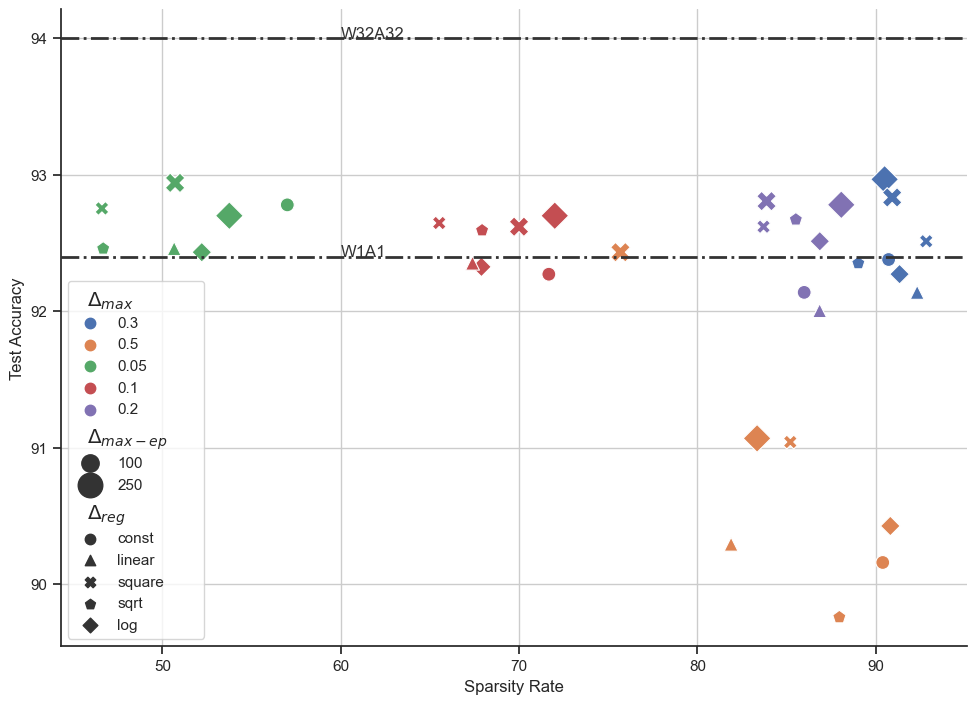

In [75]:
df1 = df.copy()
# df1 = df1[df1['dmaxep'].astype(float) < 200]
df1['dmaxep'] = df1['dmaxep'].apply(lambda x: max(int(x), 100))
y_low = floor(df['acc'].min())
best_binary = 92.4
best_full = 94.0
do_zoom = True

if do_zoom:
    df1 = df1[df1['dmax'].astype(float) < 0.6]
    y_low = floor(df1['acc'].min())

# y_low = 91
g = sns.scatterplot(df1, x="zero", y="acc", hue="dmax", style="dreg", size="dmaxep", legend='full', markers=['o', '^', 'X', 'p', 'D'], sizes=(100, 200))
legend = g.legend(markerscale=1.25)
fix_legend(legend)

plt.xlabel("Sparsity Rate")
plt.ylabel("Test Accuracy")
if not do_zoom:
    plt.yticks([x for x in range(y_low, 94+1)])

plt.axhline(best_full, 0, 100, c='#333', linestyle='-.', lw=2)
plt.annotate("W32A32", xy=(60, best_full), c='#333')
plt.axhline(best_binary, 0, 100, c='#333', linestyle='-.', lw=2)
plt.annotate("W1A1", xy=(60, best_binary), c='#333')

plt.grid('both')

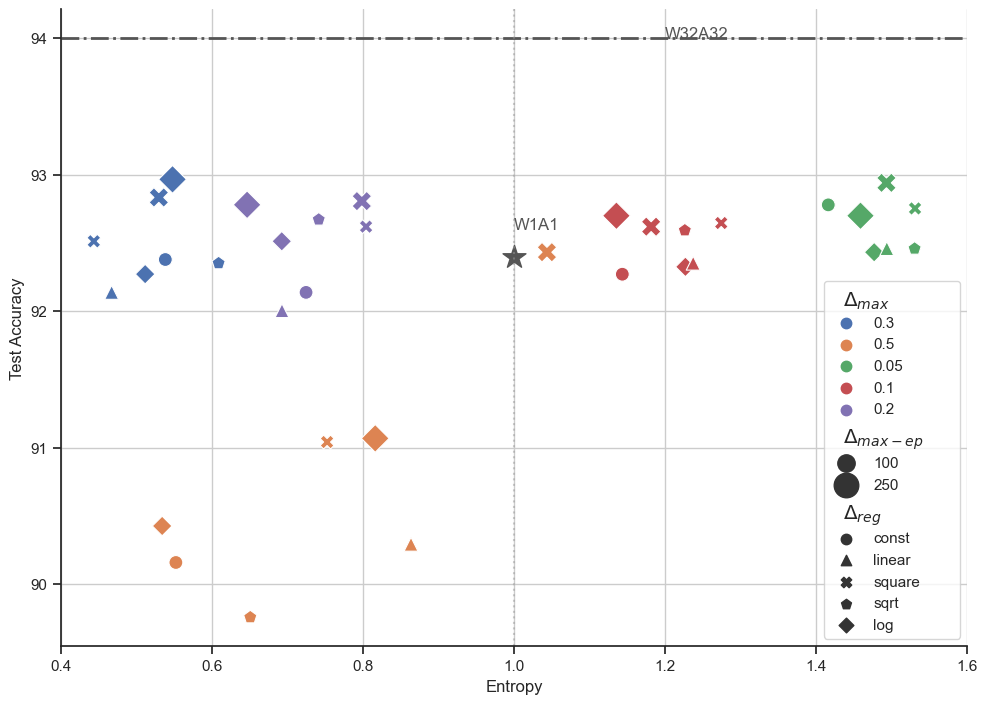

In [74]:
# g = sns.scatterplot(df1, x="entropy", y="acc", hue="dmax", style="dreg", markers=['o', '^', 'X', 'p', 'D'], s=100)
g = sns.scatterplot(df1, x="entropy", y="acc", hue="dmax", style="dreg", size="dmaxep", legend='full', markers=['o', '^', 'X', 'p', 'D'], sizes=(100, 200))
legend = g.legend(markerscale=1.25, alignment='left')
fix_legend(legend)

plt.xlabel("Entropy")
plt.xlim((0.4, 1.6))
plt.ylabel("Test Accuracy")
if not do_zoom:
    plt.yticks([x for x in range(y_low, 94+1)])

plt.axhline(best_full, 0, 100, c='#555', linestyle='-.', lw=2)
plt.annotate("W32A32", xy=(1.2, best_full), c='#555')
plt.axvline(1, 0, 100, alpha=0.5, c='#999', linestyle=':')
plt.scatter([1.0], [best_binary], c="#555", marker='*', s=300)
plt.annotate("W1A1", xy=(1.0, best_binary+0.2), c="#555")



plt.grid()

C:\Users\giaco\AppData\Local\Temp\ipykernel_14916\3472763890.py:12: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.scatterplot(df2, x="entropy", y="acc", hue="dmax", style="dreg", markers=['o', '^', 'X', 'p', 'D'], s=100, ax=ax)


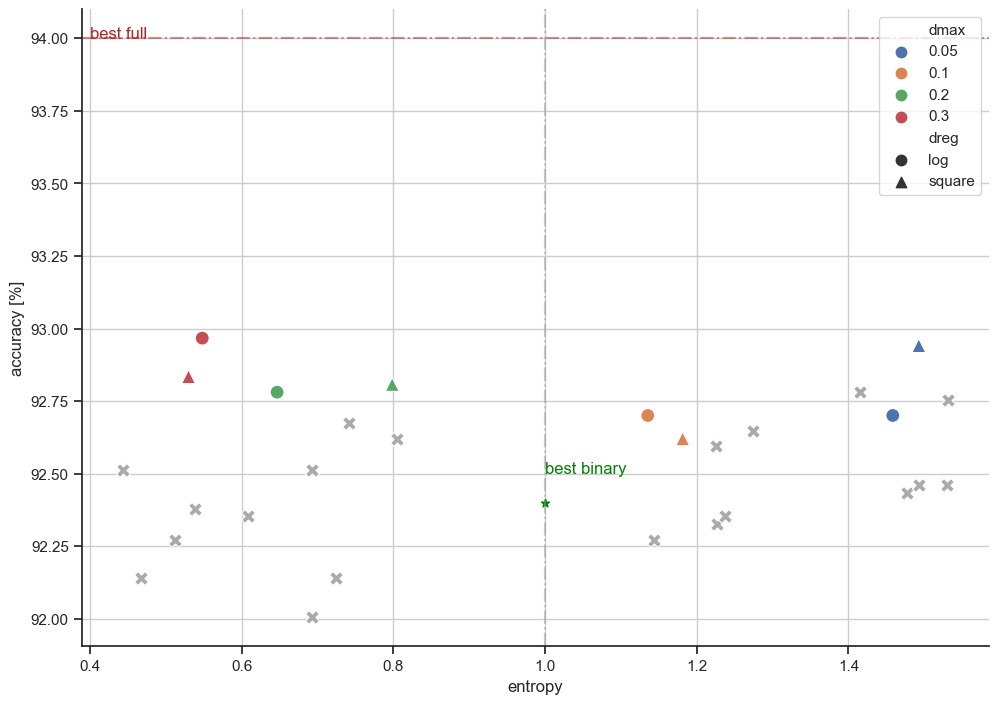

In [140]:
df2 = df.copy()
df2 = df2[(df2['dmaxep'].astype(float) > 200) & (df2['dmax'].astype(float) < 0.4)]

df3 = df.copy()
df3 = df3[(df3['dmaxep'].astype(float) < 200) & (df3['dmax'].astype(float) < 0.4)]

ax = sns.scatterplot(df3, x="entropy", y="acc", c="#aaa", marker='X', s=100, )
plt.xlabel("entropy")
plt.ylabel("accuracy [%]")


g = sns.scatterplot(df2, x="entropy", y="acc", hue="dmax", style="dreg", markers=['o', '^', 'X', 'p', 'D'], s=100, ax=ax)
g.legend(markerscale=1.25, )
plt.xlabel("entropy")
plt.ylabel("accuracy [%]")
# if not do_zoom:
#     plt.yticks([x for x in range(y_low, 94+1)])

plt.axhline(best_full, 0, 100, alpha=0.5, c='firebrick', linestyle='-.')
plt.annotate("best full", xy=(0.4, best_full), c='firebrick')
plt.axvline(1, 0, 100, alpha=0.5, c='#999', linestyle='-.')
plt.scatter([1.0], [best_binary],c="green", marker='*')
plt.annotate("best binary", xy=(1.0, best_binary+0.1), c="green")


plt.grid()

In [144]:
zero_to_entropy(60)

1.3709505944546687